### (b) Preprocessing the input
### Sampled 5,000 random (x,y) coordinate locations. Any other preprocessing steps are not used.

In [163]:
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import io

image_path = 'Mona_Lisa.jpg'
    
# Load the image
orig_image = io.imread(image_path)

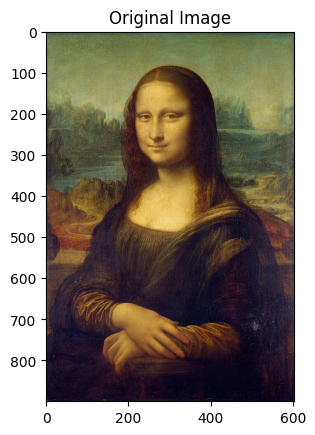

In [164]:
plt.imshow(orig_image)
plt.title(f'Original Image')
plt.show()

In [165]:
# Get image dimensions
height = orig_image.shape[0]
width = orig_image.shape[1]

# Uniformly sample 5,000 random (x, y) coordinate locations (excluding boundaries)
num_samples = 5000
np.random.seed(42)
indices = np.random.randint(1, height-1, num_samples), np.random.randint(1, width-1, num_samples)

### (c) Preprocessing the output
### Learn a different function for each channel.
### Any other preprocessing steps are not used.

In [166]:
# Learn a different function for each channel: Red, Green, Blue
X = []
y_red = []
y_green = []
y_blue = []

for i, j in zip(*indices):
    # Features: 8 neighboring pixels surrounding the target pixel (in a 3x3 grid)
    neighbors = orig_image[i-1:i+2, j-1:j+2].reshape(-1, 3)  # Flatten the 3x3 window
    
    # Red color
    X.append([i, j])
    y_red.append(orig_image[i, j, 0])  # Target is the value of the center pixel

    # Green color
    y_green.append(orig_image[i, j, 1])  # Target is the value of the center pixel

    # Blue color
    y_blue.append(orig_image[i, j, 2])  # Target is the value of the center pixel

X = np.array(X)

### (d) Build the final image

MSE (Red Channel): 85.2139
MSE (Green Channel): 82.7167
MSE (Blue Channel): 73.1958
Overall MSE (RGB): 80.3755


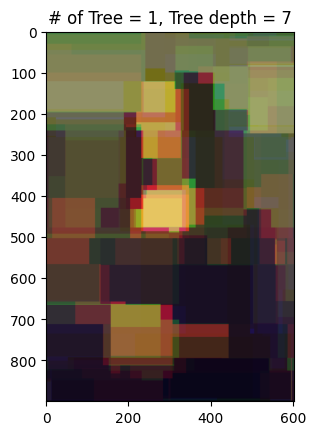

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

depth = 7
num_est = 1

# Training
rf_red_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
rf_red_regressor.fit(X, y_red)

rf_green_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
rf_green_regressor.fit(X, y_green)

rf_blue_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
rf_blue_regressor.fit(X, y_blue)

# Predict pixel values for the entire image
approx_image = np.zeros_like(orig_image)

for i in range(1, height-1):
    for j in range(1, width-1):
        # Predict the RGB values using the trained models
        approx_image[i, j, 0] = rf_red_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Red channel
        approx_image[i, j, 1] = rf_green_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Green channel
        approx_image[i, j, 2] = rf_blue_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Blue channel
    
# Compute MSE for each channel and overall MSE
mse_red = mean_squared_error(orig_image[:, :, 0], approx_image[:, :, 0])
mse_green = mean_squared_error(orig_image[:, :, 1], approx_image[:, :, 1])
mse_blue = mean_squared_error(orig_image[:, :, 2], approx_image[:, :, 2])

# Overall MSE is the average of MSE for each channel
mse_all = (mse_red + mse_green + mse_blue) / 3

print(f'MSE (Red Channel): {mse_red:.4f}')
print(f'MSE (Green Channel): {mse_green:.4f}')
print(f'MSE (Blue Channel): {mse_blue:.4f}')
print(f'Overall MSE (RGB): {mse_all:.4f}')

plt.imshow(approx_image)
plt.title(f'# of Tree = {num_est}, Tree depth = {max_depth}')
plt.savefig('hw4_2_d.png')
plt.show()

### (e) Experimentation
### i. Repeat the experiment for a random forest containing a single decision tree, but with depths 1, 2, 3, 5, 10, and 15.

Overall MSE (RGB) @ depth = 1: 98.9126
Overall MSE (RGB) @ depth = 2: 94.4554
Overall MSE (RGB) @ depth = 3: 92.8134
Overall MSE (RGB) @ depth = 5: 85.9853
Overall MSE (RGB) @ depth = 10: 77.3583
Overall MSE (RGB) @ depth = 15: 79.8622


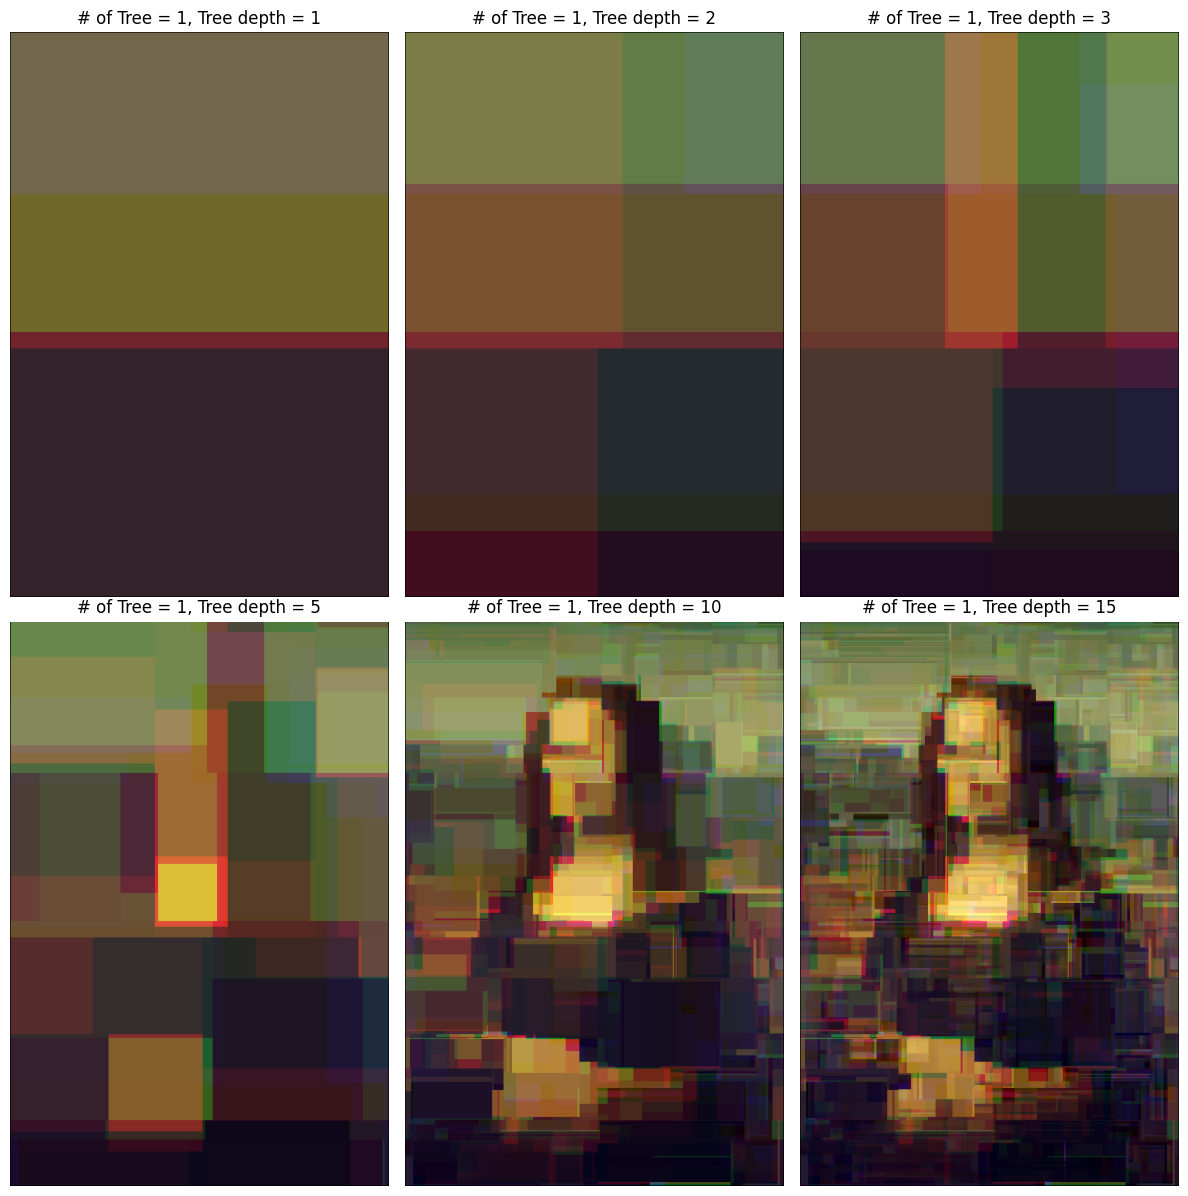

In [168]:
# List of tree depths to experiment
depth_list = [1, 2, 3, 5, 10, 15]
num_est = 1

# Prepare a figure to display results
plt.figure(figsize=(12, 12))

for depth in depth_list:
    # Training
    rf_red_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_red_regressor.fit(X, y_red)

    rf_green_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_green_regressor.fit(X, y_green)

    rf_blue_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_blue_regressor.fit(X, y_blue)

    # Predict pixel values for the entire image
    approx_image = np.zeros_like(orig_image)

    for i in range(1, height-1):
        for j in range(1, width-1):
            # Predict the RGB values using the trained models
            approx_image[i, j, 0] = rf_red_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Red channel
            approx_image[i, j, 1] = rf_green_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Green channel
            approx_image[i, j, 2] = rf_blue_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Blue channel
    
    # Compute MSE for each channel and overall MSE
    mse_red = mean_squared_error(orig_image[:, :, 0], approx_image[:, :, 0])
    mse_green = mean_squared_error(orig_image[:, :, 1], approx_image[:, :, 1])
    mse_blue = mean_squared_error(orig_image[:, :, 2], approx_image[:, :, 2])
    mse_all = (mse_red + mse_green + mse_blue) / 3
    print(f'Overall MSE (RGB) @ depth = {depth}: {mse_all:.4f}')

    plt.subplot(2, 3, depth_list.index(depth) + 1)
    plt.imshow(approx_image)
    plt.title(f'# of Tree = {num_est}, Tree depth = {depth}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('hw4_2_e_1.png')
plt.show()    

### ii. Repeat the experiment for a random forest of depth 7, but with number of trees equal to 1, 3, 5, 10, and 100.

Overall MSE (RGB) @ # of Tree = 1: 80.3755
Overall MSE (RGB) @ # of Tree = 3: 79.5783
Overall MSE (RGB) @ # of Tree = 5: 79.1518
Overall MSE (RGB) @ # of Tree = 10: 78.7945
Overall MSE (RGB) @ # of Tree = 100: 78.4453


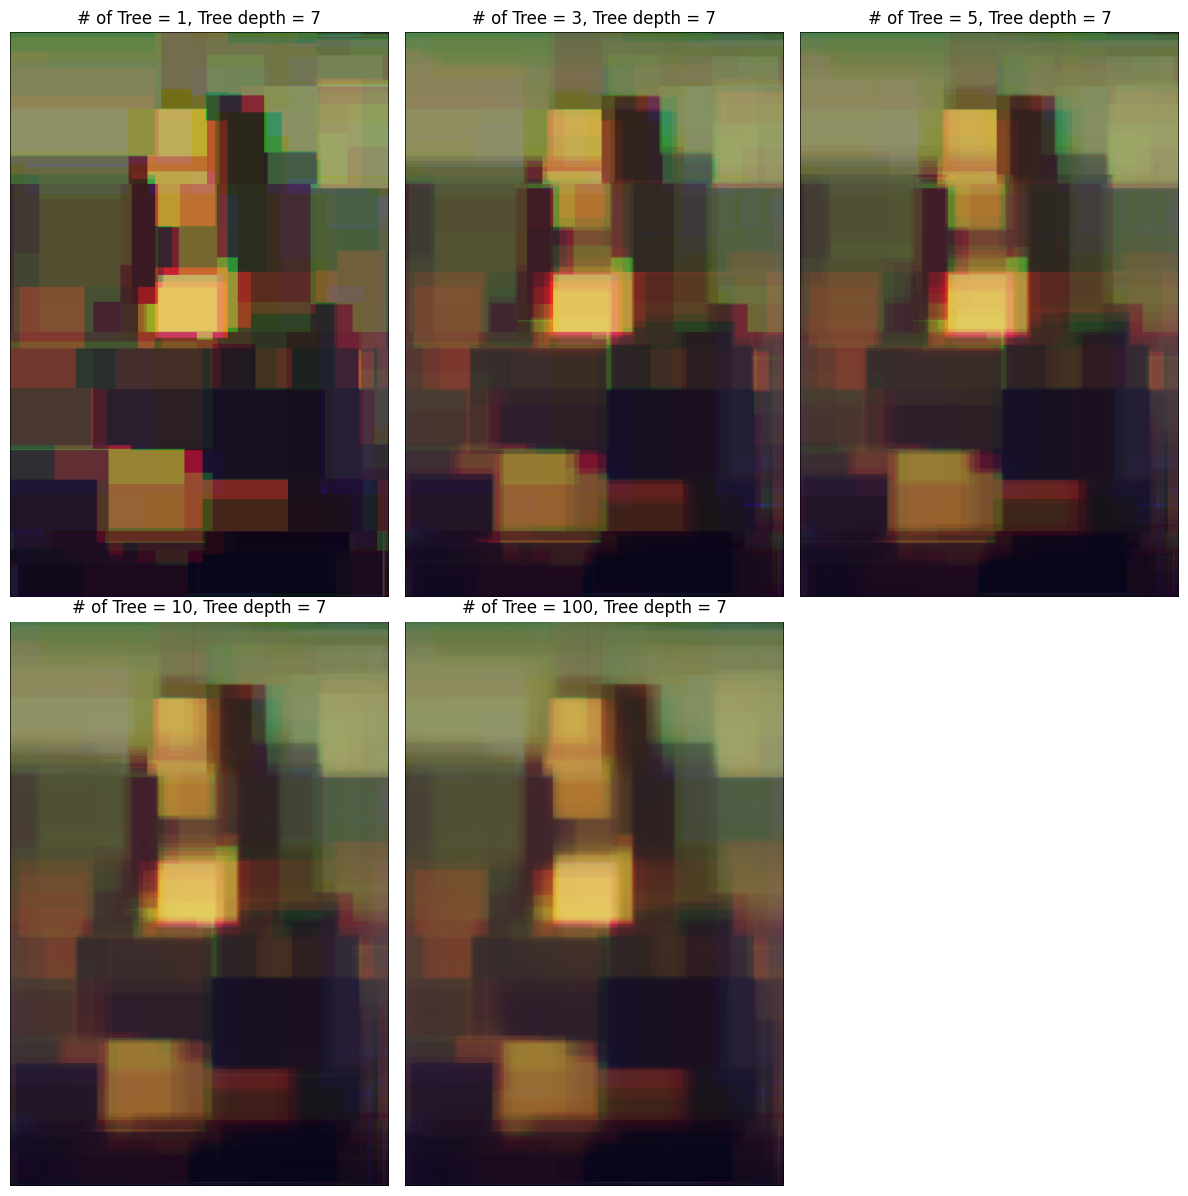

In [171]:
# List of tree depths to experiment
depth = 7
num_est_list = [1, 3, 5, 10, 100]

# Prepare a figure to display results
plt.figure(figsize=(12, 12))

for num_est in num_est_list:
    # Training
    rf_red_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_red_regressor.fit(X, y_red)

    rf_green_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_green_regressor.fit(X, y_green)

    rf_blue_regressor = RandomForestRegressor(n_estimators=num_est, max_depth=depth, random_state=42)
    rf_blue_regressor.fit(X, y_blue)

    # Predict pixel values for the entire image
    approx_image = np.zeros_like(orig_image)

    for i in range(1, height-1):
        for j in range(1, width-1):
            # Predict the RGB values using the trained models
            approx_image[i, j, 0] = rf_red_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Red channel
            approx_image[i, j, 1] = rf_green_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Green channel
            approx_image[i, j, 2] = rf_blue_regressor.predict(np.array([i, j]).reshape(1, -1))[0]  # Blue channel
    
    # Compute MSE for each channel and overall MSE
    mse_red = mean_squared_error(orig_image[:, :, 0], approx_image[:, :, 0])
    mse_green = mean_squared_error(orig_image[:, :, 1], approx_image[:, :, 1])
    mse_blue = mean_squared_error(orig_image[:, :, 2], approx_image[:, :, 2])
    mse_all = (mse_red + mse_green + mse_blue) / 3
    print(f'Overall MSE (RGB) @ # of Tree = {num_est}: {mse_all:.4f}')

    plt.subplot(2, 3, num_est_list.index(num_est) + 1)
    plt.imshow(approx_image)
    plt.title(f'# of Tree = {num_est}, Tree depth = {depth}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('hw4_2_e_2.png')
plt.show()    

### iii. Repeat the experiment using a k-NN regressor, for k = 1.

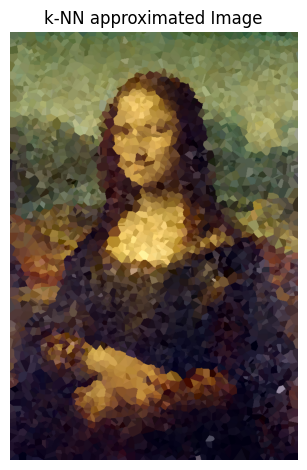

In [173]:
from sklearn.neighbors import KNeighborsRegressor

h_coords, w_coords = np.meshgrid(np.arange(height), np.arange(width))
X_total = np.column_stack([h_coords.ravel(), w_coords.ravel()])

knn_red = KNeighborsRegressor(n_neighbors=1)
knn_green = KNeighborsRegressor(n_neighbors=1)
knn_blue = KNeighborsRegressor(n_neighbors=1)
    
# Train the k-NN regressors
knn_red.fit(X, y_red)
knn_green.fit(X, y_green)
knn_blue.fit(X, y_blue)
    
# Predict the pixel values for the test data
red_pred = knn_red.predict(X_total)
green_pred = knn_green.predict(X_total)
blue_pred = knn_blue.predict(X_total)

# Predict pixel values for the entire image
knn_image = np.zeros_like(orig_image)

k = 0
for j in range(0, width):
    for i in range(0, height):
        knn_image[i, j, 0] = red_pred[k]
        knn_image[i, j, 1] = green_pred[k]
        knn_image[i, j, 2] = blue_pred[k]
        k = k + 1

knn_image = knn_image.astype(int)

plt.title('k-NN approximated Image')
plt.imshow(knn_image)
plt.axis('off')

plt.tight_layout()
plt.savefig('hw4_2_e_3.png')
plt.show()

### iv. Experiment with different pruning strategies of your choice
### a weighted k-NN regressor is chosen

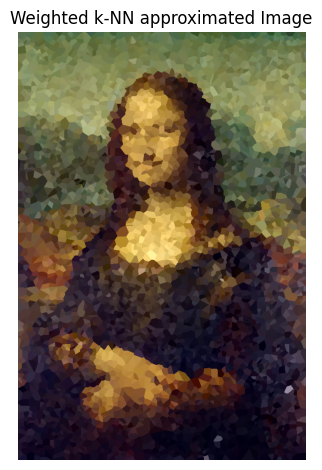

In [174]:
h_coords, w_coords = np.meshgrid(np.arange(height), np.arange(width))
X_total = np.column_stack([h_coords.ravel(), w_coords.ravel()])

knn_red = KNeighborsRegressor(n_neighbors=1, weights='distance')
knn_green = KNeighborsRegressor(n_neighbors=1, weights='distance')
knn_blue = KNeighborsRegressor(n_neighbors=1, weights='distance')
    
# Train the k-NN regressors
knn_red.fit(X, y_red)
knn_green.fit(X, y_green)
knn_blue.fit(X, y_blue)
    
# Predict the pixel values for the test data
red_pred = knn_red.predict(X_total)
green_pred = knn_green.predict(X_total)
blue_pred = knn_blue.predict(X_total)

# Predict pixel values for the entire image
knn_image = np.zeros_like(orig_image)

k = 0
for j in range(0, width):
    for i in range(0, height):
        knn_image[i, j, 0] = red_pred[k]
        knn_image[i, j, 1] = green_pred[k]
        knn_image[i, j, 2] = blue_pred[k]
        k = k + 1

knn_image = knn_image.astype(int)

plt.title('Weighted k-NN approximated Image')
plt.imshow(knn_image)
plt.axis('off')

plt.tight_layout()
plt.savefig('hw4_2_e_4.png')
plt.show()